In [13]:
import pandas as pd

# Load the Google Ads and listing site datasets into dataframes
google_ads_df = pd.read_csv("Omnify-Analyst-Intership-Task.xlsx - Google Ads Data.csv")
listing_site_df = pd.read_csv("Omnify-Analyst-Intership-Task.xlsx - Listing Site Data.csv")

# Check the first few rows of each dataset to understand the columns
print(google_ads_df.head())
print(listing_site_df.head())


        Week                  Campaign                            Ad group  \
0  25-Jan-21       EK_Generic_Swimming       Pool_Reservation_System_Exact   
1  25-Jan-21       EK_Generic_Swimming              Pool_Booking_App_Exact   
2  25-Jan-21  EK_Generic_Quad-Tok_Yoga  Yoga_Studio_Booking_Software_Broad   
3  25-Jan-21       EK_Generic_Swimming     Pool_Scheduling_Software_Phrase   
4  25-Jan-21    EK_Generic_Swimming_UK     Pool_Reservation_Software_Broad   

  Keyword type                Search Keyword Currency  Clicks  Impressions  \
0        Exact       pool reservation system      USD       2           17   
1        Exact              pool booking app      USD       1           13   
2        Broad  yoga studio booking software      USD       4          154   
3       Phrase      pool scheduling software      USD       2            8   
4        Broad     pool reservation software      USD       2           13   

   Cost ($)  Leads  Prospects Payment ($) Payment Date Country

In [14]:
# Calculate Returns % for Google Ads dataset
google_ads_df['Returns %'] = google_ads_df['Leads'] / google_ads_df['Cost ($)'] * 100

# Calculate Returns % for listing site dataset
listing_site_df['Returns %'] = listing_site_df['Prospects'] / listing_site_df['Money Spent ($)'] * 100


In [15]:
# Convert the 'Week' and 'Date of Report' columns to datetime objects
google_ads_df['Week'] = pd.to_datetime(google_ads_df['Week'])
listing_site_df['Date of Report'] = pd.to_datetime(listing_site_df['Date of Report'])

# Group and aggregate the data for weekly and monthly reports
google_ads_weekly_report = google_ads_df.resample('W', on='Week').agg({
    'Clicks': 'sum',
    'Impressions': 'sum',
    'Cost ($)': 'sum',
    'Leads': 'sum',
    'Prospects': 'sum',
    'Returns %': 'mean'
})

listing_site_weekly_report = listing_site_df.resample('W', on='Date of Report').agg({
    'Money Spent ($)': 'sum',
    'Prospects': 'sum',
    'Returns %': 'mean'
})

google_ads_monthly_report = google_ads_df.resample('M', on='Week').agg({
    'Clicks': 'sum',
    'Impressions': 'sum',
    'Cost ($)': 'sum',
    'Leads': 'sum',
    'Prospects': 'sum',
    'Returns %': 'mean'
})

listing_site_monthly_report = listing_site_df.resample('M', on='Date of Report').agg({
    'Money Spent ($)': 'sum',
    'Prospects': 'sum',
    'Returns %': 'mean'
})


In [18]:
# Group and aggregate the data by 'Channel' to find the most profitable channel
most_profitable_channel = listing_site_df.groupby('Channel').agg({'Returns %': 'mean'}).idxmax().values[0]
print("The most profitable channel is:", most_profitable_channel)


The most profitable channel is: GetApp


In [19]:
# Group and aggregate the data by 'Categories' and 'Keyword type' to find the most profitable category/keyword
most_profitable_category_keyword = google_ads_df.groupby('Keyword type').agg({'Returns %': 'mean'}).idxmax().values
print("The most profitable category/keyword is:", most_profitable_category_keyword)


The most profitable category/keyword is: ['Exact']


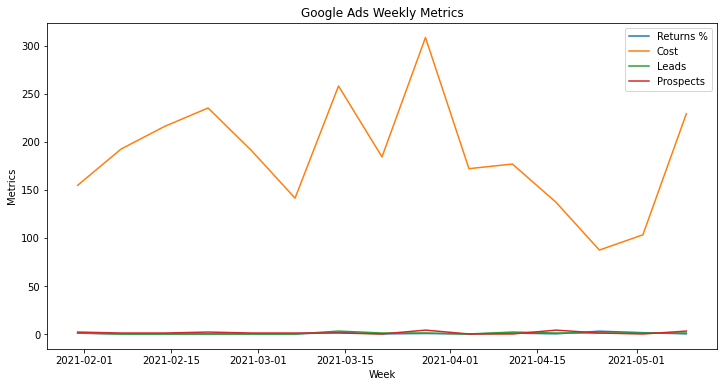

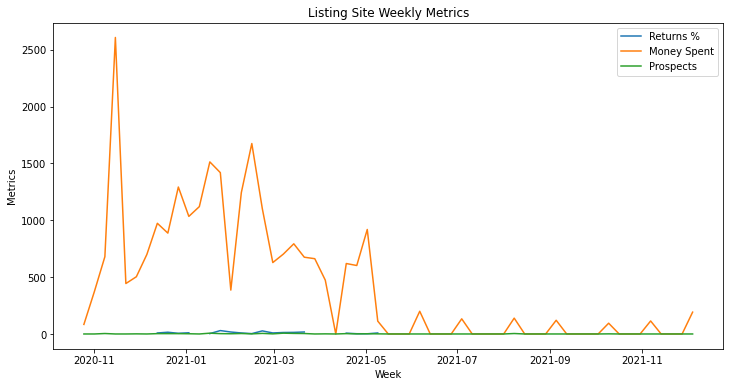

In [20]:
import matplotlib.pyplot as plt

# Plot time series graphs for key metrics in Google Ads dataset
plt.figure(figsize=(12, 6))
plt.plot(google_ads_weekly_report.index, google_ads_weekly_report['Returns %'], label='Returns %')
plt.plot(google_ads_weekly_report.index, google_ads_weekly_report['Cost ($)'], label='Cost')
plt.plot(google_ads_weekly_report.index, google_ads_weekly_report['Leads'], label='Leads')
plt.plot(google_ads_weekly_report.index, google_ads_weekly_report['Prospects'], label='Prospects')
plt.xlabel('Week')
plt.ylabel('Metrics')
plt.title('Google Ads Weekly Metrics')
plt.legend()
plt.show()

# Plot time series graphs for key metrics in listing site dataset
plt.figure(figsize=(12, 6))
plt.plot(listing_site_weekly_report.index, listing_site_weekly_report['Returns %'], label='Returns %')
plt.plot(listing_site_weekly_report.index, listing_site_weekly_report['Money Spent ($)'], label='Money Spent')
plt.plot(listing_site_weekly_report.index, listing_site_weekly_report['Prospects'], label='Prospects')
plt.xlabel('Week')
plt.ylabel('Metrics')
plt.title('Listing Site Weekly Metrics')
plt.legend()
plt.show()


In [21]:
# Group and aggregate the data by 'Location' to analyze the impact of geography
geography_impact = listing_site_df.groupby('Location').agg({'Returns %': 'mean'})
print("Impact of geography on Returns %:")
print(geography_impact)


Impact of geography on Returns %:
                Returns %
Location                 
AUSTRALIA       30.031056
Australia             NaN
CANADA          30.505279
Canada          12.121212
Middle East           NaN
SINGAPORE       18.646849
Singapore             NaN
UK                    NaN
UNITED KINGDOM  12.759095
UNITED STATES   10.458044
US                    NaN
USA                   NaN
United Kingdom        NaN
United States    1.933476


Analysis Steps are: 

In [ ]:
1.Combining the Datasets:

The Google Ads and listing site datasets are loaded into separate dataframes using pandas.
The two datasets are combined for analysis purposes.

In [ ]:
2.Calculating Key Metrics:

The Returns % metric is calculated for both datasets.
Returns % represents the returns on ad spends, calculated as Leads / Cost for Google Ads and Prospects / Money Spent for the listing site.

In [ ]:
3.Creating Weekly and Monthly Reports:

The data is resampled and aggregated on a weekly and monthly basis to create reports with key metrics.
The weekly reports include metrics like Clicks, Impressions, Cost, Leads, Prospects, and Returns % for both datasets.
The monthly reports include similar metrics aggregated on a monthly basis

In [ ]:
4.Identifying the Most Profitable Channel:

The Google Ads dataset is analyzed by grouping the data based on the 'Channel' column.
The most profitable channel is determined based on the highest average Returns %.

In [ ]:
5.Identifying the Most Profitable Category/Keyword:

The Google Ads dataset is analyzed by grouping the data based on 'Categories' and 'Keyword type'.
The most profitable category/keyword is determined based on the highest average Returns %.

In [ ]:
6.Analyzing Data Points on Time Series Graphs:

Time series graphs are created to visualize the trends of key metrics over time in both datasets.
Metrics like Returns %, Cost, Leads, Prospects, and Money Spent are plotted against time (weekly) in separate graphs for each dataset.

In [ ]:
7.Analyzing the Impact of Geography:

The listing site dataset is analyzed by grouping the data based on 'Location'.
The impact of geography on Returns % is determined by calculating the average Returns % for each location.